In [76]:
%matplotlib inline
from skimage.io import imread,imshow,imsave 
from skimage import img_as_float, img_as_ubyte 
from numpy import dstack
from numpy import clip 

def stable_kontrast(img):
    imgg = img.copy()
    img_n = imgg.ravel()
    img_n.sort()
    k = round(len(img_n)*0.05)
    a = img_n[k]
    b = img_n[-k]
    img_3 = clip(img,a,b)
    return img_3

def linear(img_3):
    img_1=img_3-img_3.min()
    t = img_3.max()-img_3.min()
    r = 1/t
    img_2 = img_1*r
    return img_2
    


img = imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')

img_f = img_as_float(img)

r = img_f[:,:,0]
g = img_f[:,:,1]
b = img_f[:,:,2]

Y = 0.2126*r+0.7152*g+0.0722*b
U = -0.0999*r-0.3360*g+0.4360*b
V = 0.6150*r-0.5586*g-0.0563*b

Y_clip = stable_kontrast(Y)
U_clip = stable_kontrast(U)
V_clip = stable_kontrast(V)

y = linear(Y_clip)
u = U
v = V

R = y + 1.2803*v
G = y - 0.2148*u - 0.3805*v
B = y + 2.1279*u

R=clip(R,0,1)
G=clip(G,0,1)
B=clip(B,0,1)

R=img_as_ubyte(R)
G=img_as_ubyte(G)
B=img_as_ubyte(B)

IMG = dstack((R,G,B))

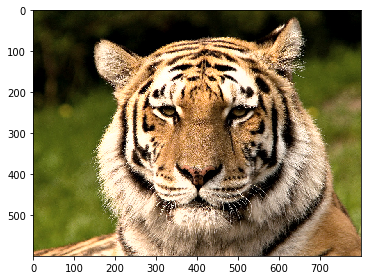

In [77]:
imshow(IMG)

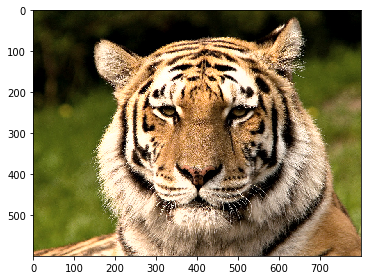

In [78]:
img_right = imread('https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png')
imshow(img_right)

In [79]:
import numpy as np
np.array_equal(IMG, img_right)

True

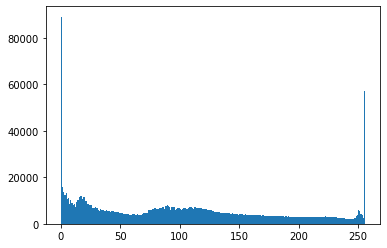

In [80]:
from matplotlib.pyplot import hist
values, bin_edges, patches = hist(IMG.ravel(), bins=range(257))

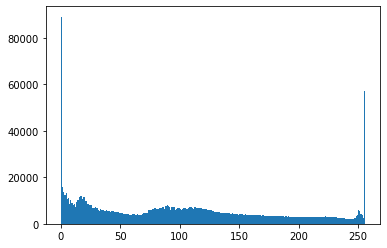

In [81]:
values, bin_edges, patches = hist(img_right.ravel(), bins=range(257))